# CS475: Programming Assignment 2.1:--> Understanding Tokenization


In this homework, you will build implement some basic tokenization algorithms to understand tokenization better. 

Part of this homework's design has been inspired from Assignment 1 of UW CSE447. 

IMPORTANT: Use python 3.7 or later

## Submission Guide

**How to submit**
* Fill out <mark>TODO</mark> blocks, **DO NOT** modify other parts of the skeleton code.
* Submit one file: hw2_{student_ID}.ipynb to KLMS
    e.g.hw2_20243150.ipynb
* **Late submission policy**: After the submission deadline, you will immediately lose 20% of the score, another 20% after 24 hours later, and so on.
Submission after 72 hours (3 days) will not be counted. However, you can use late days for this assignment, for which you have to send an email to inform the TAs. See course syllabus website Late Policy section. Use this email for this purpose: kaistcs475@gmail.com

**Note**
* Make a copy of this .ipynb file. Do not directly edit this file.
* You are required to use numpy, do not use neither pytorch nor tensorflow.
* Check whether your whole cells work well by restarting runtime code and running all before the submission.
* TA will look into the implemented functions, their validity and give corresponding score to each <mark>TODO</mark> problem.
* Make reasonable assumptions when needed, with justification provided. 
* You can reuse code segments from earlier sections to fill up later sections.
* Ask questions through Slack so that you can share information with other students.
* TA in charge: Sheikh Shafayat (sheikh.shafayat@kaist.ac.kr)

**For Help** 
If you are having trouble understanding the the homework, watch [this](https://youtu.be/kCc8FmEb1nY?si=3wiq6ETKJ4g2LP0a) video end to end to gain a deep understanding of tokenizers. However, note that this homework is not built on top of that codebase and in fact even the naming conventions are different here. Use the video just for understanding the concepts well. 

If you are short on time, reviewing the TA session slides on Tokenizers will also be helpful to solve the homework (all the images here are taken from there).

In [1]:
# Use python 3.7 or later (IMPORTANT)

import numpy as np 
from collections import Counter
import random
from tqdm import tqdm
import regex as re

# set seed
np.random.seed(42)
random.seed(42)

We use Jane Austen's "Emma" novel as the running example for the rest of our homework

In [2]:
## Load data
with open("./Emma.txt", "r") as f:
    text = f.read()

In [3]:
# see dataset properties:
print(f"Total: {len(list(text))} characters")
print(f"number of unique characthers {len(set(text))}")

Total: 899644 characters
number of unique characthers 92


However, the Emma dataset is quite big. So, we will use this small dataset from [NYTimes](https://www.nytimes.com/2024/09/04/opinion/yuval-harari-ai-democracy.html) for debugging purpose. Use this only for debugging and not for reporting final results. Do your experiments with Emma dataset and the data kept in the multilingual-data folder.

In [4]:
text_ = f"""Democracy is a conversation. Its function and survival depend on the available information technology. For most of history, no technology existed for holding large-scale conversations among millions of people. In the premodern world, democracies existed only in small city-states like Rome and Athens, or in even smaller tribes. Once a polity grew large, the democratic conversation collapsed, and authoritarianism remained the only alternative.

Large-scale democracies became feasible only after the rise of modern information technologies like the newspaper, the telegraph and the radio. The fact that modern democracy has been built on top of modern information technologies means that any major change in the underlying technology is likely to result in a political upheaval.

This partly explains the current worldwide crisis of democracy. In the United States, Democrats and Republicans can hardly agree on even the most basic facts, such as who won the 2020 presidential election. A similar breakdown is happening in numerous other democracies around the world, from Brazil to Israel and from France to the Philippines.

In the early days of the internet and social media, tech enthusiasts promised they would spread truth, topple tyrants and ensure the universal triumph of liberty. So far, they seem to have had the opposite effect. We now have the most sophisticated information technology in history, but we are losing the ability to talk with one another, and even more so the ability to listen.

As technology has made it easier than ever to spread information, attention became a scarce resource, and the ensuing battle for attention resulted in a deluge of toxic information. But the battle lines are now shifting from attention to intimacy. The new generative artificial intelligence is capable of not only producing texts, images and videos, but also conversing with us directly, pretending to be human.

Over the past two decades, algorithms fought algorithms to grab attention by manipulating conversations and content. In particular, algorithms tasked with maximizing user engagement discovered by experimenting on millions of human guinea pigs that if you press the greed, hate or fear button in the brain, you grab the attention of that human and keep that person glued to the screen. The algorithms began to deliberately promote such content. But the algorithms had only limited capacity to produce this content by themselves or to directly hold an intimate conversation. This is now changing, with the introduction of generative A.I.s like OpenAI’s GPT-4.
"""

# The author(s) of this homework do not necessarily agree/endorse the views expressed in the text above.

## Preliminary: Tokenization

Before you start: go [here](https://tiktokenizer.vercel.app/) and play with several tokenizers. Specially play with cl100k_base (GPT4) and GPT2 tokenizers. 

In [5]:
#### TO DO #### 

# Write down one thing that surprised you while playing with the tokenizer visualzier above (in 2-3 sentences)
# I write a setence like "My name is Chanwoo Kim.". Then this tokenizer split my name into three tokens which are chan, woo, kim.


Let's start with implementing the simplest form of the tokenizer: character level tokenizer. In fact many early NLP research were conducted using character level tokenization. 

Notice the CharTokenizer class below. For the rest of the homework, your implementation will follow a similar structure. 

In [6]:
class CharTokenizer: 
    def __init__(self):
        """
        All of your tokenizer implementation should have tokenizer_map attribute
        tokenizer_map is a dictionary that maps individual numbers to corresponding tokens
        map_of_char maps individual characters to corresponding token indices. In this particular case, it is the reverse of tokenizer_map; however, it is not always the case. map_of_char is an optional attribute for your tokenizer implementation. You may not need it for your implementation.
        """
        self.tokenizer_map = None 
        self.map_of_char = None
        

    def train(self, text):

        self.character_set = set(text)
        self.tokenizer_map = {i: char for i, char in enumerate(self.character_set)}
        self.map_of_char = {char: i for i, char in self.tokenizer_map.items()}

    def encode_text(self, text):
        return [self.map_of_char[char] for char in text]
        
    def decode_text(self, encoded_text):
        return "".join([list(self.map_of_char.keys())[i] for i in encoded_text])

chat_tokenizer = CharTokenizer()
chat_tokenizer.train(text_) 

Now see the usage:

In [7]:
# First, initialize the tokenizer
char_tokenizer = CharTokenizer()

# Then train the tokenizer on the Emma text
char_tokenizer.train(text) 

# Now encode some texts using the trained tokenizer
enc = char_tokenizer.encode_text(text_) # notice that we are using text_ here

# Now decode the encoded text
print(f"Decoded text:\n\n{char_tokenizer.decode_text(enc)}")

# If the decoded text is the same as the original text, then the implementation is correct
# use this sanity check to verify all of your implementations
assert char_tokenizer.decode_text(char_tokenizer.encode_text(text_)) == text_

Decoded text:

Democracy is a conversation. Its function and survival depend on the available information technology. For most of history, no technology existed for holding large-scale conversations among millions of people. In the premodern world, democracies existed only in small city-states like Rome and Athens, or in even smaller tribes. Once a polity grew large, the democratic conversation collapsed, and authoritarianism remained the only alternative.

Large-scale democracies became feasible only after the rise of modern information technologies like the newspaper, the telegraph and the radio. The fact that modern democracy has been built on top of modern information technologies means that any major change in the underlying technology is likely to result in a political upheaval.

This partly explains the current worldwide crisis of democracy. In the United States, Democrats and Republicans can hardly agree on even the most basic facts, such as who won the 2020 presidential electi

However, in reality, we do not use character level tokenization. What we use is subword level tokenization. This is why you will implement one of the most effective and popular subword level tokenization method called BPE algorithm. 


First, you will implement the vanilla version of it.

## 1. Vanilla BPETokenizer: 
This version does *not* have a preprocessing step. This is also called SentencePiece tokenization (do not confuse with the library with the same name) and was introduced into [this paper](https://arxiv.org/pdf/1808.06226)
Check out this pseudocode for a clearer understanding:

![Vanilla BPETokenizer](./images/vanilla%20BPE.png)

Note that when multiple bigrams have same frequency, ties can be broken by picking a random one. 

In [55]:
class BPETokenizer: 
    def __init__(self):
        """ 
        READ THIS DESCRIPTION:

        map_of_merged_tokens: is a dictionary that maps the merged bigram to a single token. According to the notations in the pseudocode above, it is a dictionary with keys (v_i, v_j) and values v_n. You need to keep this dictionary updated as you merge tokens in the training step. This dictionary is needed when decoding. When done right, it should look something like {(5, 68): 92, (68, 23): 93, (68, 35): 94, ...}. Here it means that token 5 and 68 were merged to form token 92, 68 and 23 were merged to form token 93, and so on. *The order in the dictionary refers to the order of merging.* 
        tokenizer_map: is a dictionary that maps token numbers to their corresponding tokens (subwords). Its length should be equal to the target_vocab_size. After a successful training, tokenizer_map might look something like {..., '995: 'uten',996: 'ion of ', 997: ' turn', ...} Notice that this behavior is opposite to get_vocab method in huggingface tokenizers, where the subwords are the keys and the values are the token numbers.
        map_of_char: maps individual characters to corresponding token indices. Optional. Use it only if your implementation needs.
        """
        self.map_of_merged_tokens = None
        self.tokenizer_map = None
        self.map_of_char = None

    @staticmethod
    def replace_pairs(lst:list, bigram:tuple, c: int):

        """ 
        Helper function to replace bigram with a single token in the list. 
        Whether to use this particular function or not depends on *your* implementations. 
        It is possible that you may not need this function at all.
        """
        i = 0
        while i < len(lst) - 1:
            if lst[i] == bigram[0] and lst[i + 1] == bigram[1]:
                lst[i] = c
                del lst[i + 1]
            else:
                i += 1
        return lst

    def train(self, text: str, target_vocab_size: int):
        self.target_vocab_size = target_vocab_size
        character_set = set(text)
        vocabsize = len(character_set) # initial vocabulary size based on the number of unique characters in the text
        assert self.target_vocab_size > vocabsize, "target vocab size must be greater than the number of unique characters in the text"
        
        map_of_char = {char: i for i, char in enumerate(character_set)}
        self.map_of_char = map_of_char
        
        map_of_merged_tokens = {}
        tokenized = [map_of_char[char] for char in text] # initial tokenization based on the characters

        #### TO DO: Write the loop and finish the implementation ####

        def pick_frq_bigram(lst:list):
            freq = {}
            for i in range(len(lst)-1):
                bigram = (lst[i], lst[i+1])
                if bigram in freq:
                    freq[bigram] += 1
                else:
                    freq[bigram] = 1
            
            max_cnt, max_bigrams = 0, []
            for bigram, cnt in freq.items():
                if cnt > max_cnt:
                    max_cnt = cnt
                    max_bigrams = [bigram]
                elif cnt == max_cnt:
                    max_bigrams.append(bigram)
            
            return random.choice(max_bigrams)

        def bigram_to_str(bigram:tuple):
            str = ""
            for t in bigram:
                str += tokenizer_map[t]
            return str

        self.map_of_char = map_of_char
        tokenizer_map = {i: char for char, i in map_of_char.items()}
        
        while len(tokenizer_map) < target_vocab_size:
            most_frq_bigram = pick_frq_bigram(tokenized)
            idx = len(tokenizer_map)
            tokenizer_map[idx] = bigram_to_str(most_frq_bigram)
            map_of_merged_tokens[most_frq_bigram] = idx
            tokenized = BPETokenizer.replace_pairs(tokenized, most_frq_bigram, idx)

        #### END ####
        self.map_of_merged_tokens = map_of_merged_tokens
        self.tokenizer_map = tokenizer_map # set this to the tokenizer_map you created in the loop above
    
    def encode_text(self, text: str):
        """Given a text, return the tokenized text as a list of integers"""

        ### TO DO: Write the implementation of the encode_text function ###
        tokenized = [self.map_of_char[char] for char in text]
        
        i = 0
        while i < len(tokenized)-1:
            bigram = tokenized[i], tokenized[i+1]
            if bigram in self.map_of_merged_tokens:
                tokenized = BPETokenizer.replace_pairs(tokenized, bigram, self.map_of_merged_tokens[bigram])
                i = max(0, i-1)
            else:
                i += 1
        ### END ###
        return tokenized
    
    def decode_text(self, tokenized_text: list): 
        """Given a tokenized text, return the original text as a string"""
        ### TO DO: Write the implementation of the decode_text function ###

        decoded = ""
        for t in tokenized_text:
            decoded += self.tokenizer_map[t]
        
        ### END ###
        return decoded


In [56]:
tokenizer = BPETokenizer()

tokenizer.train(text_, 100) # just for checking if the training is running or not

In [57]:
encoded_text = tokenizer.encode_text("Life is beautiful")
tokenizer.decode_text(encoded_text)

assert tokenizer.decode_text(tokenizer.encode_text("Life is beautiful")) == "Life is beautiful"

### 2. BPE Tokenizer with preprocessing

However, in reality we apply a preprocessing step before the BPE tokenization pipeline. 

In the preprocessing step, we split the text with a complex regex pattern to separate the texts on the space and punctuation boundary. 

To see the effect of the regex, see this example: 

In [59]:
# Uncomment and run this code: 

re.findall(r"""'(?i:[sdmt]|ll|ve|re)|[^\r\n\p{L}\p{N}]?+\p{L}+|\p{N}{1,3}| ?[^\s\p{L}\p{N}]++[\r\n]*|\s*[\r\n]|\s+(?!\S)|\s+""", text_)

['Democracy',
 ' is',
 ' a',
 ' conversation',
 '.',
 ' Its',
 ' function',
 ' and',
 ' survival',
 ' depend',
 ' on',
 ' the',
 ' available',
 ' information',
 ' technology',
 '.',
 ' For',
 ' most',
 ' of',
 ' history',
 ',',
 ' no',
 ' technology',
 ' existed',
 ' for',
 ' holding',
 ' large',
 '-scale',
 ' conversations',
 ' among',
 ' millions',
 ' of',
 ' people',
 '.',
 ' In',
 ' the',
 ' premodern',
 ' world',
 ',',
 ' democracies',
 ' existed',
 ' only',
 ' in',
 ' small',
 ' city',
 '-states',
 ' like',
 ' Rome',
 ' and',
 ' Athens',
 ',',
 ' or',
 ' in',
 ' even',
 ' smaller',
 ' tribes',
 '.',
 ' Once',
 ' a',
 ' polity',
 ' grew',
 ' large',
 ',',
 ' the',
 ' democratic',
 ' conversation',
 ' collapsed',
 ',',
 ' and',
 ' authoritarianism',
 ' remained',
 ' the',
 ' only',
 ' alternative',
 '.\n\n',
 'Large',
 '-scale',
 ' democracies',
 ' became',
 ' feasible',
 ' only',
 ' after',
 ' the',
 ' rise',
 ' of',
 ' modern',
 ' information',
 ' technologies',
 ' like',
 ' the'

After splitting the whole dataset into small chunks, we apply the algorithm on each chunk, that is, when we count the bigrams, we do not count bigrams from two neigboring chunks. See the pseudocode below:
![BPETokenizer Preprocess](./images/BPE_preprocess.png)

However, note that here the example shows everything on "text" space ("hug", "pug", "i" etc) for the sake of interpretability. In reality, we do these merging on the token space (v1, v2, v3 ...), ie, on the token ids.  

In [60]:
class BPETokenizerwithPreprocessing: 
    def __init__(self):
        self.target_vocab_size = None
        self.map_of_merged_tokens = None
        self.tokenizer_map = None
        self.map_of_char = None
        self.split_pattern = r"""'(?i:[sdmt]|ll|ve|re)|[^\r\n\p{L}\p{N}]?+\p{L}+|\p{N}{1,3}| ?[^\s\p{L}\p{N}]++[\r\n]*|\s*[\r\n]|\s+(?!\S)|\s+"""
        # this is the split boundary pattern used in GPT4 tokenizer. Feel free to ask ChatGPT to explain what this regex pattern does.
    

    
    @staticmethod
    def replace_pairs(lst:list, bigram:tuple, c: int):

        """ 
        Helper function to replace bigram with a single token in the list. 
        Whether to use this particular function or not depends on *your* implementation of the tokenizer. 
        It is possible that you may not need this function at all.
        """
        i = 0
        while i < len(lst) - 1:
            if lst[i] == bigram[0] and lst[i + 1] == bigram[1]:
                lst[i] = c
                del lst[i + 1]
            else:
                i += 1
        return lst
    

    ### OPTIONAL (not graded) ####

    # If you need, you can define another helper function to replace bigrams in the list of lists.
    
    @staticmethod
    def replace_every_pairs(lst:list, bigram:tuple, c: int):
        for word in lst:
            BPETokenizerwithPreprocessing.replace_pairs(word, bigram, c)
    
    #### END ####
    def preprocess_text(self, text: str):
        return re.findall(self.split_pattern, text)
    
    def train(self, text: str, target_vocab_size: int):
        
        self.target_vocab_size = target_vocab_size
        character_set = set(text)
        vocabsize = len(character_set)
        map_of_char = {char: i for i, char in enumerate(character_set)}
        self.map_of_char = map_of_char
        map_of_merged_tokens = {}
        print(f"Preprocessing the text")
        preprocessed = self.preprocess_text(text)

        #### TO DO: Write the loop and finish the implementation ####

        def pick_frq_bigram(lst:list):
            freq = {}
            for word in lst:
                for i in range(len(word)-1):
                    bigram = (word[i], word[i+1])
                    if bigram in freq:
                        freq[bigram] += 1
                    else:
                        freq[bigram] = 1
            
            max_cnt, max_bigrams = 0, []
            for bigram, cnt in freq.items():
                if cnt > max_cnt:
                    max_cnt = cnt
                    max_bigrams = [bigram]
                elif cnt == max_cnt:
                    max_bigrams.append(bigram)
            
            return random.choice(max_bigrams)
        
        def bigram_to_str(bigram:tuple):
            str = ""
            for t in bigram:
                str += tokenizer_map[t]
            return str

        tokenizer_map = {i: char for char, i in map_of_char.items()}
        tokenized = []
        for word in preprocessed:
            tokenized.append([map_of_char[char] for char in word])

        while len(tokenizer_map) < target_vocab_size:
            most_frq_bigram = pick_frq_bigram(tokenized)
            idx = len(tokenizer_map)
            tokenizer_map[idx] = bigram_to_str(most_frq_bigram)
            map_of_merged_tokens[most_frq_bigram] = idx
            BPETokenizerwithPreprocessing.replace_every_pairs(tokenized, most_frq_bigram, idx)

        #### END ####
        self.map_of_merged_tokens = map_of_merged_tokens
        self.tokenizer_map = tokenizer_map # set this to the tokenizer_map you created in the loop above
        

    def encode_text(self, text: str):
        """Given a text, return the tokenized text"""
        ### TO DO: Write the implementation of the encode_text function ###
        preprocessed = self.preprocess_text(text)
        tokenized = []
        for word in preprocessed:
            tokenized.append([self.map_of_char[char] for char in word])

        for word in tokenized:
            i = 0
            while i < len(word)-1:
                bigram = word[i], word[i+1]
                if bigram in self.map_of_merged_tokens:
                    word = BPETokenizerwithPreprocessing.replace_pairs(word, bigram, self.map_of_merged_tokens[bigram])
                    i = max(0, i-1)
                else:
                    i += 1

        output = []
        for word in tokenized:
            output.extend(word)
        
        #### END ####
        return output
    
    def decode_text(self, tokenized_text: list): 
        """Given a tokenized text, return the original text"""
        ### TO DO: Write the implementation of the encode_text function ###

        decode_text = ""
        for t in tokenized_text:
            decode_text += self.tokenizer_map[t]
        #### END ####
        return decode_text


In [61]:
tokenizer = BPETokenizerwithPreprocessing()
tokenizer.train(text, 500) 
encoded = tokenizer.encode_text("Life is beautiful")
tokenizer.decode_text(encoded)


Preprocessing the text


'Life is beautiful'

In [66]:
encoded = tokenizer.encode_text("인생은 아름답다") # if you try Korean text, it will raise an error

KeyError: '인'

### Tokenizing in bytespace 

So far we have only worked with English texts. 

But of course, there are thousands of other languages in the world, and not all languages can be represented in the way English is represented so far. This is more true for character based langauges like Chinese. Even for Korean language, building from the character level [like the way we did in English] is not possible. Which is why we need an universal way to represent languages of various scripts. Utf-8 provides such a way. 

Utf-8 is an encoding method that encodes **all** human written languages into variable length byte sequece of up to 4 bytes (256 bits). One way to think of it is to have an universal "alphabet" for all human written language, where the alphabet size is 256. 

However, the alphabet analogy is not quite right. To see why, see below:

In [67]:
# Let's play with uft-8 encoding
s = "Life"
print(f"{s} is encoded as: {list(s.encode('utf-8'))}")
print(f"L is encoded as: {list('L'.encode('utf-8'))}")
print(f"i is encoded as: {list('i'.encode('utf-8'))}")
print(f"f is encoded as: {list('f'.encode('utf-8'))}")
print(f"e is encoded as: {list('e'.encode('utf-8'))}")


s = "생일"
print(f"{s} is encoded as: {list(s.encode('utf-8'))}")
print(f"생 is encoded as: {list('생'.encode('utf-8'))}")
print(f"ㅅ is encoded as: {list('ㅅ'.encode('utf-8'))}")
print(f"새 is encoded as: {list('새'.encode('utf-8'))}")
print(f"이 is encoded as: {list('이'.encode('utf-8'))}")
print(f"일 is encoded as: {list('일'.encode('utf-8'))}")

s = "🎂"
print(f"{s} is encoded as: {list(s.encode('utf-8'))}")

s= "🤞"
print(f"{s} is encoded as: {list(s.encode('utf-8'))}")

Life is encoded as: [76, 105, 102, 101]
L is encoded as: [76]
i is encoded as: [105]
f is encoded as: [102]
e is encoded as: [101]
생일 is encoded as: [236, 131, 157, 236, 157, 188]
생 is encoded as: [236, 131, 157]
ㅅ is encoded as: [227, 133, 133]
새 is encoded as: [236, 131, 136]
이 is encoded as: [236, 157, 180]
일 is encoded as: [236, 157, 188]
🎂 is encoded as: [240, 159, 142, 130]
🤞 is encoded as: [240, 159, 164, 158]


Did you see that utf-8 can also encode emojies and many languages? However, also note that the mapping from each alphabet to utf-8 encoding is not always very intuitive (look at the Korean example carefully). The reason English alphabet takes up lower values than non-English alphabet is because utf-8 is backward compatible (ASCII). For all non English languages, the encoded lists are usually long. 

Let's look at some more examples:

In [68]:
# decoding 
encoded = [236, 131, 157, 236, 157, 188]
print(f"Decoded: {bytes(encoded).decode('utf-8', errors='replace')}")

encoded = [150, 131, 157, 236, 157, 188] 
print(f"Decoded: {bytes(encoded).decode('utf-8', errors='replace')}")

# the second one is not a valid utf-8 encoding, so it will be replaced with a question mark 
# if your language model is not strong enough in modeling lanuguages, it will through more errors.


Decoded: 생일
Decoded: ���일


To know more about utf-8 encoding, check out the corresponding Wikipedia page. 

Because of the obvious advantage of using utf-8 encoding, when we train a real encoder, we first project all the data into byte-space and then do the tokenizer training. 

### 4. ByteSpacePreprocessed
BPE algorithm on byte space, however, the text first go through the regex preprocessing. Make sure to do the preprocessing first. 

Make sure to do the preprocessing **before** the byte encoding (and not after).

In [70]:
class BPETokenizerByteSpacePreprocessed: 
    def __init__(self):

        self.map_of_merged_tokens = None
        self.tokenizer_map = None
        self.map_of_char = None
        self.split_pattern = r"""'(?i:[sdmt]|ll|ve|re)|[^\r\n\p{L}\p{N}]?+\p{L}+|\p{N}{1,3}| ?[^\s\p{L}\p{N}]++[\r\n]*|\s*[\r\n]|\s+(?!\S)|\s+"""


    ### OPTIONAL (not graded) ####

    # If you need, you can define another helper function to replace bigrams in the list of lists.
    @staticmethod
    def replace_every_pairs(lst:list, bigram:tuple, c: int):
        for word in lst:
            BPETokenizerByteSpacePreprocessed.replace_pairs(word, bigram, c)
    
    #### END ####

    @staticmethod
    def replace_pairs(lst:list, bigram:tuple, c: int):

        """ 
        Helper function to replace bigram with a single token in the list. 
        Whether to use this particular function or not depends on *your* implementation of the tokenizer. 
        It is possible that you may not need this function at all.
        """
        i = 0
        while i < len(lst) - 1:
            if lst[i] == bigram[0] and lst[i + 1] == bigram[1]:
                lst[i] = c
                del lst[i + 1]
            else:
                i += 1
        return lst
    
    def preprocess_text(self, text: str):
        return re.findall(self.split_pattern, text)

    def train(self, text: str, target_vocab_size: int):

        self.target_vocab_size = target_vocab_size

        character_set = set([i for i in range(256)]) # We start with all the possible bytes, which is 256
        vocabsize = len(character_set)
        assert self.target_vocab_size > vocabsize, "target vocab size must be greater than 256"

        map_of_char = {char: i for i, char in enumerate(character_set)}
        self.map_of_char = map_of_char
        
        map_of_merged_tokens = {}
        ### Implement the tokenizer training in byte space. Make sure to preprocess the texts first####
        # Your implementation should not be too different from what you have done before. 
        # Just make sure to deal with the quirks of working with bytes instead of characters.

        def pick_frq_bigram(lst:list):
            freq = {}
            for word in lst:
                for i in range(len(word)-1):
                    bigram = (word[i], word[i+1])
                    if bigram in freq:
                        freq[bigram] += 1
                    else:
                        freq[bigram] = 1
            
            max_cnt, max_bigrams = 0, []
            for bigram, cnt in freq.items():
                if cnt > max_cnt:
                    max_cnt = cnt
                    max_bigrams = [bigram]
                elif cnt == max_cnt:
                    max_bigrams.append(bigram)
            
            return random.choice(max_bigrams)
        
        preprocessed = self.preprocess_text(text)
        tokenized = [list(word.encode('utf-8')) for word in preprocessed]
        tokenizer_map = map_of_char.copy()

        while len(tokenizer_map) < target_vocab_size:
            most_frq_bigram = pick_frq_bigram(tokenized)
            idx = len(tokenizer_map)
            tokenizer_map[idx] = most_frq_bigram
            map_of_merged_tokens[most_frq_bigram] = idx
            BPETokenizerByteSpacePreprocessed.replace_every_pairs(tokenized, most_frq_bigram, idx)

        ### END ###

        self.map_of_merged_tokens = map_of_merged_tokens
        self.tokenizer_map = tokenizer_map # set this to the tokenizer_map you created in the loop above

    
    def encode_text(self, text: str):
        """Given a text, return the tokenized text"""
        ### Implement the encode_text function ###
        # You only need to sligthly modify existing code in your previous implementation 
        preprocessed = self.preprocess_text(text)
        tokenized = [list(word.encode('utf-8')) for word in preprocessed]

        for word in tokenized:
            i = 0
            while i < len(word)-1:
                bigram = word[i], word[i+1]
                if bigram in self.map_of_merged_tokens:
                    word = BPETokenizerByteSpacePreprocessed.replace_pairs(word, bigram, self.map_of_merged_tokens[bigram])
                    i = max(0, i-1)
                else:
                    i += 1
        
        output = []
        for word in tokenized:
            output.extend(word)
        tokenized = output
        
        ### END ###
        return tokenized
    
    def decode_text(self, tokenized_text: list): 
        """Given a tokenized text, return the original text"""

        ### TO DO: Write the implementation of the decode_text function ###
        # make sure to use errors='replace' when decoding
        
        def to_basis(x: int) -> list:
            if x < 256:
                return [x]
            a, b = self.tokenizer_map[x]
            a = to_basis(a)
            b = to_basis(b)
            a.extend(b)
            return a
        
        decode = []
        for lst in tokenized_text:
            decode.extend(to_basis(lst))
        
        decode_text = bytes(decode).decode('utf-8', errors='replace')
        
        return decode_text
        ### END ###




In [71]:
# Sanity check

with open("./kor.txt", "r") as f: # grab some Korean text from Wikipedia
    kor_text = f.read()

tokenizer = BPETokenizerByteSpacePreprocessed()
tokenizer.train(kor_text, 500)  # train the tokenizer on the Korean text
encoded = tokenizer.encode_text("Life is beautiful 🤞") # still manages to tokenize English
decoded = tokenizer.decode_text(encoded) 

print(f"Decoded: {decoded}")

assert decoded == "Life is beautiful 🤞"

Decoded: Life is beautiful 🤞


In [72]:
# Try with Korean text; 

encoded = tokenizer.encode_text("생일 축하해")
decoded = tokenizer.decode_text(encoded)

assert decoded == "생일 축하해" 
# and of course it works with Korean as well!

In [79]:
### TO DO ###

# What are some distinctions you notice between the tokens produced by byte-level BPE with preprocessing vs vanilla BPE?

# Train tokenizers using the Emma text first and do some analysis
# Feel free to run some codes and show some examples, plot graphs etc.
# citing papers/other resources is also fine, but make sure to explain the distinctions in your own words

# ANSWER
# When size of vocabulary is small(ex. 500) encoded token length for vanilla BPE is smaller than Byte-level BPE.
# But as I grew vacabulary size larger, the length of eoncoded tokens with byte-level BPE shorten a lot, 
# and eventually byte-level BPE started to overcome the vanilla with shorter token length when vocab size is 1000.
# And interestingly, encoded token lists for vanilla BPE with 2000 and 2500 vocab size has longer length than vanilla BPE with 1500 vocab size.
# With this result, I concluded that for vanilla BPE, 1500 vocab size is enough to represent the given corpus.
# Byte-level BPE seems like having more power to imply meaningful tokens.
# Its power will be shown clearly if train with more data and bigger vocab size.

vocab_size = [500, 1000, 1500, 2000, 2500]

vanilla_tokenizers = [BPETokenizer() for _ in range(5)]
byte_tokenizers = [BPETokenizerByteSpacePreprocessed() for _ in range(5)]

for i, vs in enumerate(vocab_size):
    vanilla_tokenizers[i].train(text, vs)
    byte_tokenizers[i].train(text, vs)

In [143]:
# From the begining of Martin Luther King Jr's speech "I have a dreem".
test_text = """
I am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation.
Five score years ago, a great American, in whose symbolic shadow we stand today, signed the Emancipation Proclamation. This momentous decree came as a great beacon light of hope to millions of Negro slaves who had been seared in the flames of withering injustice. It came as a joyous daybreak to end the long night of their captivity.
But one hundred years later, the Negro still is not free. One hundred years later, the life of the Negro is still sadly crippled by the manacles of segregation and the chains of discrimination. One hundred years later, the Negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity. One hundred years later, the Negro is still languished in the corners of American society and finds himself an exile in his own land. And so we’ve come here today to dramatize a shameful condition.
In a sense we’ve come to our nation’s capital to cash a check. When the architects of our republic wrote the magnificent words of the Constitution and the Declaration of Independence, they were signing a promissory note to which every American was to fall heir. This note was a promise that all men, yes, black men as well as white men, would be guaranteed the unalienable Rights of Life, Liberty and the pursuit of Happiness. It is obvious today that America has defaulted on this promissory note, insofar as her citizens of color are concerned. Instead of honoring this sacred obligation, America has given the Negro people a bad check, a check which has come back marked insufficient funds.
"""

In [144]:
print("Token length for different vocab size\n")
vanilla_lens, byte_lens = [], []
for i, vs in enumerate(vocab_size):
    print(f"Trained with {vs} vocab size ")
    l = len(vanilla_tokenizers[i].encode_text(test_text))
    vanilla_lens.append(l)
    print(f"Vanilla_BPE: {l}")
    l = len(byte_tokenizers[i].encode_text(test_text))
    byte_lens.append(l)
    print(f"Byte_BPE: {l}")

Token length for different vocab size

Trained with 500 vocab size 
Vanilla_BPE: 868
Byte_BPE: 897
Trained with 1000 vocab size 
Vanilla_BPE: 817
Byte_BPE: 807
Trained with 1500 vocab size 
Vanilla_BPE: 775
Byte_BPE: 760
Trained with 2000 vocab size 
Vanilla_BPE: 781
Byte_BPE: 746
Trained with 2500 vocab size 
Vanilla_BPE: 785
Byte_BPE: 751


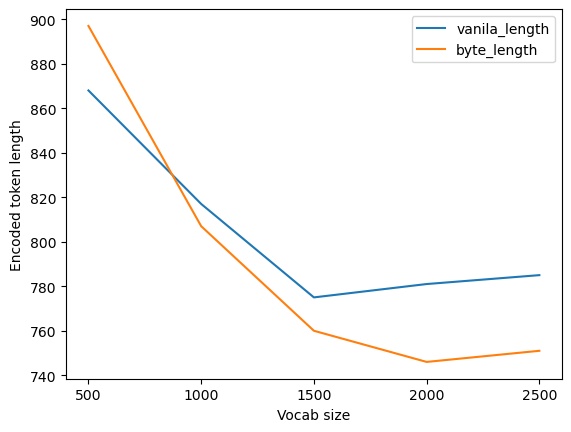

In [147]:
from matplotlib import pyplot as plt

plt.plot(vocab_size, vanilla_lens, label="vanila_length")
plt.plot(vocab_size, byte_lens, label="byte_length")
plt.legend()
plt.xlabel('Vocab size')
plt.ylabel('Encoded token length')
plt.xticks(np.arange(500, 3000, 500))
plt.show()

# Multilingual Tokenization analysis: 

You are given two files in the ./multilingual-data folder. The English one is a chunk of the original English Emma novel. The Korean one is machine translated version of that. Now you will think about some properties of the tokenizers when trained on different corpus.

In [73]:
with open("./multilingual-data/kor_Emma.txt", "r") as f: 
    kor_emma = f.read()

with open("./multilingual-data/en_Emma.txt", "r") as f: 
    eng_emma = f.read()


In [82]:
eval_text_en = """“Ever since the day—about four years ago—that Miss Taylor and I met
with him in Broadway Lane, when, because it began to drizzle, he darted
away with so much gallantry, and borrowed two umbrellas for us from
Farmer Mitchell’s, I made up my mind on the subject. I planned the
match from that hour; and when such success has blessed me in this
instance, dear papa, you cannot think that I shall leave off
match-making.”

“I do not understand what you mean by ‘success,’” said Mr. Knightley.
“Success supposes endeavour. Your time has been properly and delicately
spent, if you have been endeavouring for the last four years to bring
about this marriage. A worthy employment for a young lady’s mind! But
if, which I rather imagine, your making the match, as you call it,
means only your planning it, your saying to yourself one idle day, ‘I
think it would be a very good thing for Miss Taylor if Mr. Weston were
to marry her,’ and saying it again to yourself every now and then
afterwards, why do you talk of success? Where is your merit? What are
you proud of? You made a lucky guess; and _that_ is all that can be
said.”

“And have you never known the pleasure and triumph of a lucky guess?—I
pity you.—I thought you cleverer—for, depend upon it a lucky guess is
never merely luck. There is always some talent in it. And as to my poor
word ‘success,’ which you quarrel with, I do not know that I am so
entirely without any claim to it. You have drawn two pretty pictures;
but I think there may be a third—a something between the do-nothing and
the do-all. If I had not promoted Mr. Weston’s visits here, and given
many little encouragements, and smoothed many little matters, it might
not have come to any thing after all. I think you must know Hartfield
enough to comprehend that.”"""

eval_text_kor = """"4년 전쯤 테일러 양과 내가 브로드웨이 레인에서 그를 만난 날부터, 이슬비가 내리기 시작하자 그는 매우 용감하게 달려가서
Farmer Mitchell's에서 우산 두 개를 빌렸을 때부터, 나는 그 문제에 대해 마음먹었습니다. 나는 그 순간부터
결혼을 계획했습니다. 그리고 이런 성공이 이 경우에 나에게 축복이 되었을 때, 사랑하는 아빠, 당신은 내가
결혼을 그만둘 것이라고 생각할 수 없습니다."

"나는 당신이 '성공'이라는 말로 무슨 뜻인지 이해하지 못합니다." 나이틀리 씨가 말했습니다.
"성공은 노력을 전제로 합니다. 지난 4년 동안 이 결혼을 이루기 위해 노력했다면, 당신의 시간은 적절하고 신중하게
보내졌습니다. 젊은 여성의 마음에 가치 있는 일이었습니다! 하지만
만약 당신이 결혼을 한다고 상상한다면, 당신이 말하는 대로
그저 계획하는 것일 뿐이고, 어느 날 한가한 시간에 ‘웨스턴 씨가 테일러 양과 결혼하면 아주 좋은 일이 될 것 같아’라고 스스로에게 말하고, 그 후로 가끔씩 스스로에게 다시 말하는 것일 뿐이라면, 왜 성공에 대해 이야기하는 거지? 당신의 공로는 어디에 있지? 당신은 무엇을 자랑스러워하는 거지? 당신은 행운의 추측을 했고; _그게_ 말할 수 있는 전부야.

"그리고 당신은 행운의 추측의 즐거움과 승리를 결코 알지 못했니?—나는 당신을
불쌍히 여긴다.—나는 당신이 더 똑똑하다고 생각했다—왜냐하면, 행운의 추측은
결코 단순한 행운이 아니기 때문이다. 항상 어떤 재능이 거기에 있다. 그리고 당신이 다투는 나의 형편없는
단어 ‘성공’에 대해 말하자면, 나는 내가 그것에 대한 권리가 전혀 없다는 것을 모른다. 당신은 두 개의 예쁜 그림을 그렸다.
하지만 나는 세 번째 그림이 있을 수 있다고 생각한다—아무것도 하지 않는 것과
모든 것을 하는 것 사이의 무언가. 내가 웨스턴 씨의 방문을 홍보하지 않았고,
많은 작은 격려를 하지 않았고, 많은 작은 문제들을 해결하지 않았다면,
결국 아무것도 이루어지지 않았을지도 모릅니다. 당신은 하트필드를
충분히 알고 있을 테니 그걸 이해할 수 있을 겁니다."""

In [24]:
### TODO: Open Ended 

# Play around with the BPETokenizerByteSpacePreprocessed that you implemented using the Korean and English Emma data, which you can use for training the tokenizers, and write down if you see anything interesting. 

# What does your findings imply for designing multilingual tokenizers? 

# Feel free to nudge vocabulary size as well. You can use the eval_text in the above cell for validation.

# Do not hesitate to look into the actual tokens and see how much of it makes sense.

# ANSWER
# I trained tokenizers on each languages and get token length for eval texts.
# When I tokenized with the same languages which tokenizers are trained, they really shorten the length a lot.
# But If I give them the other languages, they result was almost samewith the original text.
# A few merged tokens are some meaningless white spaces or punctuation marks.
# Byte-level tokenizer could handle various languages and even emojis, but it can not meaningfully tokenize it
# if they are not included in the train data.

tokenizer = BPETokenizerByteSpacePreprocessed()
tokenizer.train(kor_text, 500)  # train the tokenizer on the Korean text
encoded = tokenizer.encode_text("Life is beautiful 🤞") # still manages to tokenize English
decoded = tokenizer.decode_text(encoded) 

kor_tokenizer = BPETokenizerByteSpacePreprocessed()
kor_tokenizer.train(kor_emma, 500)
kor_encoded = kor_tokenizer.encode_text(eval_text_kor)

eng_tokenizer = BPETokenizerByteSpacePreprocessed()
eng_tokenizer.train(eng_emma, 500)
eng_encoded = eng_tokenizer.encode_text(eval_text_en)

print("Original utf-8 token length")
print("Korean", len(list(eval_text_kor.encode('utf-8'))))
print("English", len(list(eval_text_en.encode('utf-8'))))

print("Encoded token length")
print("Korean", len(kor_encoded))
print("English", len(eng_encoded))

print("Tokenized with different lang")
print("En tokenizer, Kor text", len(eng_tokenizer.encode_text(eval_text_kor)))
print("Kor tokenizeer, En text", len(kor_tokenizer.encode_text(eval_text_en)))

cross_encoded = eng_tokenizer.encode_text(eval_text_kor)
li = filter(lambda x: x >= 256, cross_encoded)
for token in li:
    print(eng_tokenizer.decode_text([token]))

Original utf-8 token length
Korean 2438
English 1827
Encoded token length
Korean 1095
English 942
Tokenized with different lang
En tokenizer, Kor text 2412
Kor tokenizeer, En text 1794
ar
er
 M
it
ch
ell



�
’
.


—
—
—
�
’
—
,

,



## Wordpiece 

Now, implement the wordpiece tokenizer algorithm, which is almost similar to BPE, except the objective function is a bit different. 

Check the description below. 

![Wordpiece Algorithm](./images/Wordpiece.png)


Make sure to:
1. Preprocess the text first
2. Work on the byte-space (utf-8 encoding)
3. When you estimate p(v_i, v_j), divide by N-1, instead of N where N is the total number of tokens in the corpus.

In [125]:
class WordPieceTokenizer: 
    def __init__(self):

        self.map_of_merged_tokens = None
        self.tokenizer_map = None
        self.map_of_char = None
        self.split_pattern = r"""'(?i:[sdmt]|ll|ve|re)|[^\r\n\p{L}\p{N}]?+\p{L}+|\p{N}{1,3}| ?[^\s\p{L}\p{N}]++[\r\n]*|\s*[\r\n]|\s+(?!\S)|\s+"""
    
    ### OPTIONAL ####
    # You can define another helper function to replace bigrams in the list of lists.
    @staticmethod
    def replace_every_pairs(lst:list, bigram:tuple, c: int):
        for word in lst:
            BPETokenizerByteSpacePreprocessed.replace_pairs(word, bigram, c)
    
    #### END ####
    
    @staticmethod
    def replace_pairs(lst:list, bigram:tuple, c: int):

        """ 
        Helper function to replace bigram with a single token in the list. 
        Whether to use this particular function or not depends on *your* implementation of the tokenizer. 
        It is possible that you may not need this function at all.
        """
        i = 0
        while i < len(lst) - 1:
            if lst[i] == bigram[0] and lst[i + 1] == bigram[1]:
                lst[i] = c
                del lst[i + 1]
            else:
                i += 1
        return lst
    
    def preprocess_text(self, text: str):
        return re.findall(self.split_pattern, text)

    def train(self, text: str, target_vocab_size: int):

        self.target_vocab_size = target_vocab_size

        character_set = set([i for i in range(256)]) # We start with all the possible bytes, which is 256
        vocabsize = len(character_set)
        assert self.target_vocab_size > vocabsize, "target vocab size must be greater than 256"

        map_of_char = {char: i for i, char in enumerate(character_set)}
        self.map_of_char = map_of_char
        
        map_of_merged_tokens = {}

        ### TODO: Your implementation of wordpiece training goes here. ### 
        # Make sure to preprocess the text first

        def pick_frq_bigram(lst:list):
            bigram_freq = {}
            for word in lst:
                for i in range(len(word)-1):
                    bigram = (word[i], word[i+1])
                    if bigram in bigram_freq:
                        bigram_freq[bigram] += 1
                    else:
                        bigram_freq[bigram] = 1
            
            unigram_freq = {}
            for word in lst:
                for x in word:
                    if x in unigram_freq:
                        unigram_freq[x] += 1
                    else:
                        unigram_freq[x] = 1
            
            max_prob, max_bigrams = 0, []
            for bigram, cnt in bigram_freq.items():
                prob = cnt / (unigram_freq[bigram[0]] * unigram_freq[bigram[1]])
                if prob > max_prob:
                    max_prob= prob
                    max_bigrams = [bigram]
                elif prob == max_prob:
                    max_bigrams.append(bigram)
            
            return random.choice(max_bigrams)

        preprocessed = self.preprocess_text(text)
        tokenized = [list(word.encode('utf-8')) for word in preprocessed]
        tokenizer_map = map_of_char.copy()

        while len(tokenizer_map) < target_vocab_size:
            most_frq_bigram = pick_frq_bigram(tokenized)
            idx = len(tokenizer_map)
            tokenizer_map[idx] = most_frq_bigram
            map_of_merged_tokens[most_frq_bigram] = idx
            WordPieceTokenizer.replace_every_pairs(tokenized, most_frq_bigram, idx)

        ### END ###

        self.map_of_merged_tokens = map_of_merged_tokens
        self.tokenizer_map = tokenizer_map # set this to the tokenizer_map you created in the loop above

    
    def encode_text(self, text: str):
        """Given a text, return the tokenized text"""
        ### Implement the encode_text function ###
        # You only need to sligthly modify existing code in your previous implementation 
        preprocessed = self.preprocess_text(text)
        tokenized = [list(word.encode('utf-8')) for word in preprocessed]

        for word in tokenized:
            i = 0
            while i < len(word)-1:
                bigram = word[i], word[i+1]
                if bigram in self.map_of_merged_tokens:
                    word = WordPieceTokenizer.replace_pairs(word, bigram, self.map_of_merged_tokens[bigram])
                    i = max(0, i-1)
                else:
                    i += 1
        
        output = []
        for word in tokenized:
            output.extend(word)
        tokenized = output

        return tokenized
    
    def decode_text(self, tokenized_text: list): 
        """Given a tokenized text, return the original text"""

        ### TO DO: Write the implementation of the decode_text function ###
        def to_basis(x: int) -> list:
            if x < 256:
                return [x]
            a, b = self.tokenizer_map[x]
            a = to_basis(a)
            b = to_basis(b)
            a.extend(b)
            return a
        
        decode = []
        for lst in tokenized_text:
            decode.extend(to_basis(lst))
        
        decoded = bytes(decode).decode('utf-8', errors='replace')
        return decoded
        # make sure to use errors='replace' when decoding
    
        ### END ###


In [126]:
# Sanity check

tokenizer = WordPieceTokenizer()
tokenizer.train(text, 500)
encoded = tokenizer.encode_text("Life is beautiful 🤞")
decoded = tokenizer.decode_text(encoded)

assert decoded == "Life is beautiful 🤞"